# Demonstration of Boostrap 
## Contact: Michael Pyrcz, University of Texas at Austin, Geostatistics Course
#
## Steps:
### 1. Build an initial sample set with $ndata$ samples.
### 2. Draw from this initial sample set, with replacement, $ndata$ times to build a new realization of the sample.  
###    Repeat this $nreal$ times to make realizations of the sample.
### 3. Calculate the statistic of interest for each realization. This demonstration considers with mean and variance.  
###    We could have considered any sstatistic including median, 13th percentile, skew etc. 
### 4. - 6. Quantify and visualize uncertainty with histograms and summary statistics.
#
### Efron, 1982, The jackknife, the bootstrap, and other resampling plans, Society of Industrial and Applied Math, 
### CBMS-NSF Monographs, 38.

In [3]:
# Imports 
import scipy
import numpy as np
import pandas as pd
import math
import random as rand
import matplotlib.pyplot as plt

In [4]:
# 1. Make Dataset with User Specified Number of Data (assume Gaussian N[0,1] for this example, but could be any distribution)
nreal = 100                                # number of bootstrap realizations
ndata = 10                                 # number of data samples available
data = np.zeros((ndata))                    
for idata in range(0, ndata):
    data[idata] = np.random.normal()
print('The initial sample set:')
data

The initial sample set:


array([-0.18677385,  0.98977305, -0.4067072 ,  0.05361021,  0.41729354,
       -0.21902716, -0.10534167,  0.23110019,  1.05781114,  0.17989805])

In [5]:
# 2. Perform ndata random draws with replacement, nreal times.  Here we aquire the nreal realizations of the distribution of 
# ndata, samples.
draw = np.zeros((ndata,nreal)) 
for ireal in range(0, nreal):
    for isample in range(0, ndata):
        draw[isample,ireal] = rand.choice(data)
print('The realizations of the sample set:')
draw

The realizations of the sample set:


array([[ 0.17989805, -0.10534167, -0.4067072 ,  0.05361021,  0.05361021,
         0.41729354,  1.05781114, -0.18677385,  0.98977305, -0.18677385,
         0.17989805,  1.05781114, -0.21902716, -0.4067072 ,  0.41729354,
         0.41729354,  0.98977305,  0.23110019, -0.18677385, -0.10534167,
         0.98977305, -0.10534167, -0.4067072 ,  1.05781114,  0.17989805,
         0.17989805, -0.18677385,  0.23110019, -0.18677385,  0.17989805,
        -0.4067072 , -0.21902716,  0.98977305,  0.05361021,  0.17989805,
        -0.4067072 ,  0.17989805,  0.98977305, -0.10534167,  0.17989805,
        -0.4067072 , -0.21902716,  1.05781114,  0.17989805, -0.4067072 ,
        -0.18677385,  0.41729354,  0.98977305, -0.10534167, -0.18677385,
         0.17989805,  0.23110019, -0.4067072 , -0.10534167,  0.41729354,
        -0.18677385, -0.4067072 , -0.18677385,  0.41729354, -0.18677385,
         0.23110019, -0.4067072 ,  0.23110019,  1.05781114, -0.10534167,
         0.41729354,  1.05781114,  0.05361021,  0.4

In [6]:
# 3. Calculate summary statistic - average and variance
mean = np.zeros((nreal))
var = np.zeros((nreal))
for ireal in range(0, nreal):
    s = 0.0
    ss = 0.0
    count = 0.0
    for isample in range(0, ndata):
        s = s + draw[isample,ireal]
        ss = ss + draw[isample,ireal] * draw[isample,ireal]
        count = count + 1.0
    mean[ireal] = s / count 
    var[ireal] = ss / count - mean[ireal] * mean[ireal]
print('The statistics of interest for each realization of the sample set:')
print(mean,var)

The statistics of interest for each realization of the sample set:
[ 0.24530049  0.17262642  0.20598284  0.26440213 -0.0492951   0.08784567
  0.17389989  0.59444634  0.21362901  0.27134083  0.15660209  0.12219185
  0.19277918  0.0964992   0.11760378  0.19406096  0.29585258  0.37395466
 -0.05358049  0.3468243   0.45843851  0.35119394  0.29804632  0.26997413
  0.26958013  0.11112492  0.28397051  0.03931779  0.13913107  0.25685661
  0.16197677  0.03872405  0.19975106  0.25258661  0.11467156  0.21961829
 -0.12028555  0.35056762 -0.10253656  0.27395793  0.12346408  0.12420159
  0.32911653  0.35204282  0.07889887  0.06474094  0.08102944  0.20438896
  0.13597659  0.23949339  0.06764159  0.11326688  0.16398204  0.25982416
  0.25483973  0.2857942   0.1487001   0.11978256  0.18909184  0.36497089
  0.08401909  0.28383473  0.24584058  0.32689892  0.20263882  0.22757599
  0.3484698   0.28033837  0.16563584  0.23626806  0.20742325  0.5161211
  0.24858011  0.55873777  0.31180413  0.38172872  0.088706

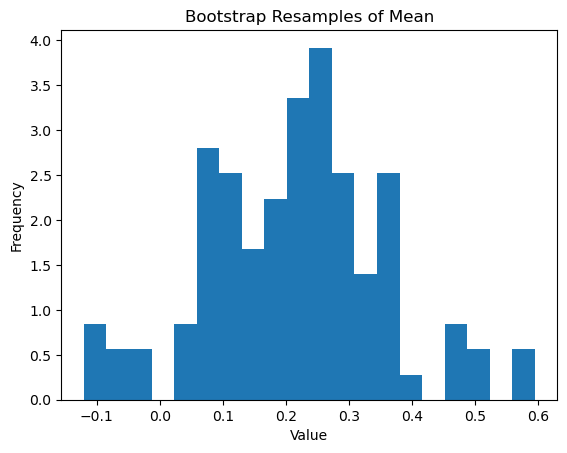

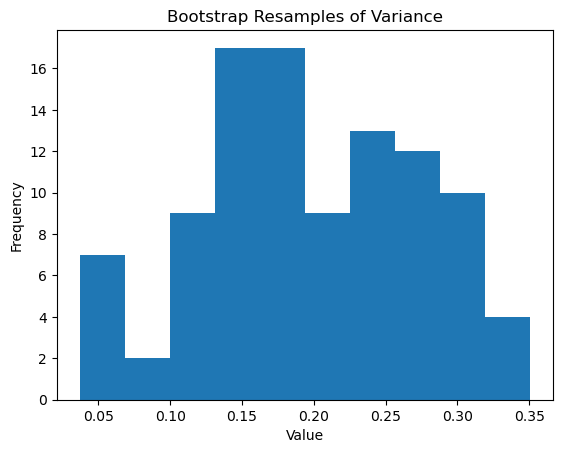

In [8]:
# 4. Visualize the summary statistic, calculate the variance or any other measure of spread to represent uncertainty in
#    the summary statistic.
plt.hist(mean, bins=20, density=True)
plt.title("Bootstrap Resamples of Mean")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(var)
plt.title("Bootstrap Resamples of Variance")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
# 5. Summary statistics to describe uncertainty in the mean from bootstrap
columns = ['mean']
df_mean = pd.DataFrame(mean,columns=columns)
df_mean.describe()

,mean
count,100.000000
mean,0.213480
std,0.139978
min,-0.120286
25%,0.119238
50%,0.217612
75%,0.284731
max,0.594446


In [10]:
# 6. Summary statistics to describe uncertainty in the variance from bootstrap
columns = ['var']
df_var = pd.DataFrame(var,columns=columns)
df_var.describe()

,var
count,100.000000
mean,0.197913
std,0.075296
min,0.036905
25%,0.147377
50%,0.190316
75%,0.260660
max,0.350872


### What did we learn?
#### 1. Uncertainty decreases rapidly as the number of samples increases.
#### 2. Bootstrap result for uncertainty in the mean is the same as standard error.
#### 3. Bootstrap provides uncertainty in any statistic.
#### 4. Bootstrap does not account for spatial context, location of data, local nonstationarity, spatial correlation etc.